# Baseball Analytics: Finding Undervalued Pitchers with Clustering
## A Machine Learning Analysis inspired from Tatsuya Ishii's *Using Machine Learning Algorithms to Identyify Undervalued Baseball Players*
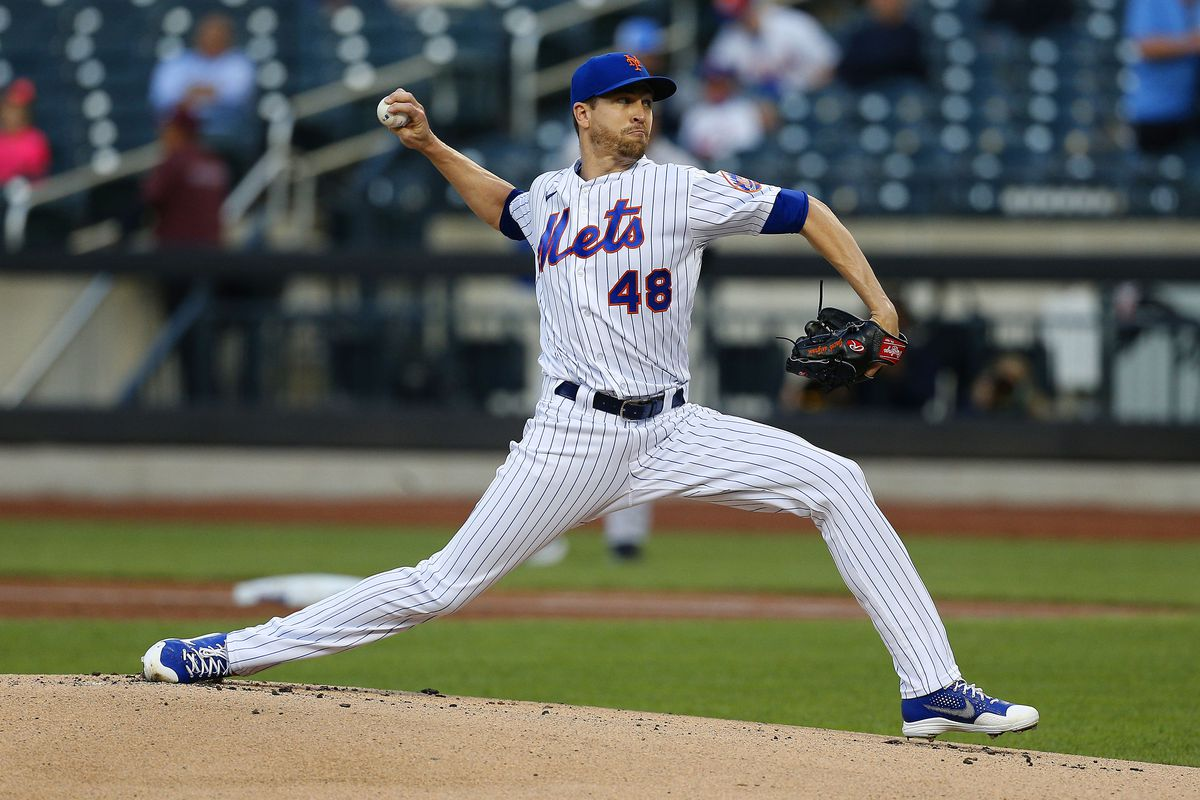
# Introduction
Although this class isn't necessarily about machine learning, this project is definitely within the range of data analysis (plus I got confirmation from Professor Sako to do it) just with machine learning invovled. 

Since the dawn of major league baseball sabermetrics when Bill James created various offensive and defensive statistics that more accurately evaluates a baseball player, analytics in baseball has only increased in complexity since then where we see the use of Bayesian statistics and Machine Learning to create player models. 

## Small Glossary of Relevant Baseball Statistics
Inning - Round of baseball where both teams go at the mound, 9 in a total game.
* ERA - Earned Runs Average - Measures the amount of runs a pitcher gives to the opposing team per 9 innings.
* FIP - Fielding Independent Pitching - ERA but reduces its sample space to events that are in complete control by the pitcher.
* WAR - Wins above replacement - Conglomerative statistic that aims to give a complete horizontal analysis of all the different facets a player has.
* IP - Innings Pitched - How many innings a pitcher pitched in a season/game/month/etc...

## Famous Model Example
A famous model, that is also proprietary by the MLB, is PECOTA (Player Empirical Comparison and Optimization Test Algorithm) that projects player performance based on comparison with historical player-seasons. There are three elements to this model,

*1) Major-league equivalencies, to allow us to use minor-league stats to project how a player will perform in the majors;*
*2) Baseline forecasts, which use weighted averages and regression to the mean to produce an estimate of a player's true talent level;*
*3) A career-path adjustment, which incorporates information about how comparable players' stats changed over time.*

Basically, PECOTA is a model that will forecast player performance for a following season given the information above; and there's no other model that's better at doing this that has been found. There has been the use of artificial neural networks to forecast player performance, but this has proven unsubstantial relative to PECOTA.

# Project
I actively do independent research in the baseball sphere, so this corresponds to option 2 on the final project guide on canvas; yet this is also my take on a research article by Tatsuya Ishii *Using Machine Learning Algorithms to Identyify Undervalued Baseball Players*, where he also used clustering to find undervalued pitchers in the MLB (so its a mix of option 2 and 3). If you're interested in reading about some of the casual baseball research/reporting that I do, I have a substack page that has all of my articles. 

https://jonathanpalomo.substack.com/?utm_source=substack&utm_medium=web&utm_campaign=substack_profile

## Brief Literature Review
Ishii utilizes K-means clustering and hierarchical clustering to identify undervalued pitchers. At a high level, this means that he aims to group pitchers based off of their various data attributes such as pitch movement, break angle, spin rate and release extension. Clustering is unsuperivsed, therefore, it will create the classifications of 'good' pitchers and 'bad' pitchers, and the further away a pitcher (data point) is away from the cluster mean (centroid), it corresponds deviation from that cluster's meaning. Ishii inspects those who are far away from the 'good' cluster, who are still classified into the 'good' cluster, and determines that these are the players who are considered undervalued. Ishii finds the far away pitchers by computing an ERA differential for each player in the 'good' cluster, and those with the highest deviation are undervalued. They represent the pitchers who vastly underperformed relative to their cluster mean. After he found these undervalued players, he determined if they improved next season by evaluating their subsequent season's WAR/IP, and he found that for all the players he gathered they all improved. 

## Hypothesis
I plan to deviate from Ishii's article by tweaking two major features. Instead of computing an ERA differential, I plan to compute a FIP differential because its defense independent for the pitcher. I also want to do a PCA to reduce the data down to two principal components that will do the clustering. This option is for the sake of having a simple plot to look at rather than a variety of pairwise plots. 

The goal of this study is to utilize K - Means clustering to identify underperforming pitchers in a cluster and to see whether or not they rebounded in the subsequent year, if this were to happen, then these players are considered **undervalued** in that subsequent year due to their performance in the last. 

### Principal Component Analysis
A dimension reduction method that allows for the reduction of computation time and visualization among high dimensional data. More specifically it is a statistical technique used to reduce the dimensionality of a data set while retaining as much information as possible. It does this by identifying the directions in which the data varies the most, and then projecting the data onto a new set of dimensions that are orthogonal to each other. These new dimensions, called principal components, are ranked by the amount of variation they capture in the data. The first principal component captures the most variation, the second principal component captures the second most, and so on.

In this analysis we have 12 dimensions of data, thus visualization is impossible, so PCA to visualize would be useful. 

It's worthy to note that PCA is a black box analysis, because the two variables we retrieve from it won't be interpretable, it's strictly there for visualization.

### K - Means Clustering
An unsuperivsed ML algorithm that groups observations based off of certain similarities (classifying the data for us). The amount of groups, clusters, are determined before the run of the algorithm, and each group will have a centroid, which is the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. There are various heuristics to determine the amount of groups, a popular one being the elbow method which is a method that aims to minimize the sum of squared errors relative the cluster mean for ever K = 1, 2, 3, ... .  


## Data
We restrict our analysis to pitching data due to the richness of pitching data available relative to hitter data. Pitching data has a variety of variables readily available such as spin rate in RPM, break angle, pitch movement, pitch classification, release extension and more. These data attributes will be received from baseballSavant.com in the form of a csv file for the 2021 season, and we can see whether or not the underperforming pitchers did well in the 2022 season. We will also filter pitchers by examining only those who have thrown at least 50 innings in the season, because this is standardized across many pitcher analyses.

Due to the nature of clustering, all the data will be scaled/standardized with zero mean and unit standard deviation.

Our data aims to keep the scope of the pitcher's metrics within the pitcher himself, therefore, we don't use data that relies on the outcome of a ball in play (except the rate metrics that rely on those), only the metrics that are controlled by the pitcher.

# Dataframe Attributes/Columns
The data below were extracted from FanGraphs.com and BaseballSavant.com. The dimensions of our dataset is 303 rows and 14 columns, where each row represents a pitcher, and each column is indicative of the following ...

* **player_name** - Name of player.
* **player_id** - identifying no. of player.
* **wOBA** - Pitcher's overall offensive value.
* **xwOBA** - Pitcher's overall offensive value, that eliminates fielding factors.
* **launch_speed** - average initial velocity of pitched ball.
* **launch_angle** - average Angle of ascent of batted ball.
* **spin_rate** - average rate of rotation around a pitched ball's axis across the various repertoire of pitches the pitcher has in RPM.
* **velocity** - average velocity of pitched ball through the strike zone.
* **effective_speed** - Derived speed based on the the extension of the pitcher's release.
* **eff_min_vel** - effective_speed - velocity, to indicate deviation between the two.
* **release_extension** - quantifies exactly how much closer a pitcher's release point is to home plate
* **W** - No. of wins the pitcher received that season
* **FIP** - Fielding Independent Pitching
* **WAR** - Wins above replacement 


# Model Scheme
The goal is to run a K-means clustering and Gaussian Mixtures algorithm on our data and provide relevant visualizations that display the clusters. The hard part behind any form of clustering is to make meaningful clusters that accurately capture the observations; for us we want clusters that classify 'excellent' pitchers, and 'poor' pitchers, which may be divided up into more than a binary classification.

* We will utilize the **sklearn.cluser** module to run clustering algorithms and scaling functions, the **pandas** for dataframe manipulation, **matplotlib** for visualization, and **numpy** for numeric computation. 

* After we have the clusters, we compute a FIP differential for the 'excellent' clusters to determine the undervalued players. I'll pick 8 total pitchers and utilize their pitching analytics, and outside data, to see precisely why this pitcher is underperforming.

* Once we have that analysis, we can compare their WAR/IP between the 2021 season (the season we're analyzing) and the 2022 season to see if there was a significant rebound.

* Then to visualize the clusters, I will run a PCA on my dataset with two principal components, and then graph the centroids on the 2 dimensional scatter plot.

# Code
## Loading packages and data

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Import data cleaned in R's dplyr package
pitchMaster = pd.read_csv("pitchDat.csv")
pitchMaster.head

<bound method NDFrame.head of            player_name  player_id   woba  xwoba  launch_speed  launch_angle  \
0        Adams, Austin     613534  0.297  0.311          84.3          18.6   
1         Akin, Keegan     669211  0.361  0.349          89.4          17.5   
2        Alcala, Jorge     660896  0.275  0.293          86.5          11.6   
3     Alcantara, Sandy     645261  0.279  0.288          87.1           3.9   
4     Alexander, Tyler     641302  0.315  0.318          88.1          17.8   
..                 ...        ...    ...    ...           ...           ...   
298    Yarbrough, Ryan     642232  0.325  0.322          84.0          16.7   
299      Ynoa, Huascar     660623  0.299  0.317          89.8           7.1   
300        Young, Alex     622065  0.389  0.365          89.7           9.2   
301       Zimmer, Kyle     622092  0.321  0.334          88.8          10.2   
302  Zimmermann, Bruce     669145  0.359  0.378          90.4          13.4   

     spin_rate  veloc

In [15]:
# We first scale our data with mean = 0 and var = 0
# Player_name and player_id are unchanged because
# they only serve identifying purposes
scaler = MinMaxScaler()
scaler.fit(pitchMaster.iloc[:,2:14])
pitchMaster.iloc[:,2:14] = scaler.transform(pitchMaster.iloc[:,2:14])
pitchMaster

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster
0,"Adams, Austin",613534,0.525641,0.587379,0.123711,0.782493,0.982553,0.497462,0.507418,0.644737,0.223744,0.176471,0.449915,0.172414,3
1,"Akin, Keegan",669211,0.799145,0.771845,0.649485,0.753316,0.465565,0.502538,0.506924,0.631579,0.255708,0.117647,0.655348,0.206897,3
2,"Alcala, Jorge",660896,0.431624,0.500000,0.350515,0.596817,0.582185,0.766497,0.754698,0.605263,0.168950,0.176471,0.478778,0.160920,3
3,"Alcantara, Sandy",645261,0.448718,0.475728,0.412371,0.392573,0.467401,0.827411,0.822453,0.631579,0.278539,0.529412,0.370119,0.632184,0
4,"Alexander, Tyler",641302,0.602564,0.621359,0.515464,0.761273,0.344353,0.446701,0.495054,0.750000,0.410959,0.117647,0.534805,0.252874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Yarbrough, Ryan",642232,0.645299,0.640777,0.092784,0.732095,0.320478,0.081218,0.138971,0.750000,0.589041,0.529412,0.544992,0.287356,1
299,"Ynoa, Huascar",660623,0.534188,0.616505,0.690722,0.477454,0.482094,0.629442,0.659743,0.710526,0.347032,0.235294,0.456706,0.298851,1
300,"Young, Alex",622065,0.918803,0.849515,0.680412,0.533156,0.392103,0.451777,0.462413,0.644737,0.196347,0.117647,0.850594,0.022989,3
301,"Zimmer, Kyle",622092,0.628205,0.699029,0.587629,0.559682,0.389348,0.522843,0.566271,0.736842,0.392694,0.235294,0.607810,0.126437,3


In [18]:
# Check if data is scaled
pitchMaster.iloc[:,2:14]

,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR
0,0.525641,0.587379,0.123711,0.782493,0.982553,0.497462,0.507418,0.644737,0.223744,0.176471,0.449915,0.172414
1,0.799145,0.771845,0.649485,0.753316,0.465565,0.502538,0.506924,0.631579,0.255708,0.117647,0.655348,0.206897
2,0.431624,0.500000,0.350515,0.596817,0.582185,0.766497,0.754698,0.605263,0.168950,0.176471,0.478778,0.160920
3,0.448718,0.475728,0.412371,0.392573,0.467401,0.827411,0.822453,0.631579,0.278539,0.529412,0.370119,0.632184
4,0.602564,0.621359,0.515464,0.761273,0.344353,0.446701,0.495054,0.750000,0.410959,0.117647,0.534805,0.252874
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.645299,0.640777,0.092784,0.732095,0.320478,0.081218,0.138971,0.750000,0.589041,0.529412,0.544992,0.287356
299,0.534188,0.616505,0.690722,0.477454,0.482094,0.629442,0.659743,0.710526,0.347032,0.235294,0.456706,0.298851
300,0.918803,0.849515,0.680412,0.533156,0.392103,0.451777,0.462413,0.644737,0.196347,0.117647,0.850594,0.022989
301,0.628205,0.699029,0.587629,0.559682,0.389348,0.522843,0.566271,0.736842,0.392694,0.235294,0.607810,0.126437


In [16]:
# I want to create interpretable clusters so I start 
# with 4
km   = KMeans(n_clusters = 4)
# This code assigns clusters to each obs
pred = km.fit_predict(pitchMaster.iloc[:,2:13]) 

# Add clusters to dataframe
pitchMaster['cluster'] = pred

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [17]:
# Check the cluster assignment
pitchMaster

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster
0,"Adams, Austin",613534,0.525641,0.587379,0.123711,0.782493,0.982553,0.497462,0.507418,0.644737,0.223744,0.176471,0.449915,0.172414,3
1,"Akin, Keegan",669211,0.799145,0.771845,0.649485,0.753316,0.465565,0.502538,0.506924,0.631579,0.255708,0.117647,0.655348,0.206897,0
2,"Alcala, Jorge",660896,0.431624,0.500000,0.350515,0.596817,0.582185,0.766497,0.754698,0.605263,0.168950,0.176471,0.478778,0.160920,3
3,"Alcantara, Sandy",645261,0.448718,0.475728,0.412371,0.392573,0.467401,0.827411,0.822453,0.631579,0.278539,0.529412,0.370119,0.632184,1
4,"Alexander, Tyler",641302,0.602564,0.621359,0.515464,0.761273,0.344353,0.446701,0.495054,0.750000,0.410959,0.117647,0.534805,0.252874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Yarbrough, Ryan",642232,0.645299,0.640777,0.092784,0.732095,0.320478,0.081218,0.138971,0.750000,0.589041,0.529412,0.544992,0.287356,1
299,"Ynoa, Huascar",660623,0.534188,0.616505,0.690722,0.477454,0.482094,0.629442,0.659743,0.710526,0.347032,0.235294,0.456706,0.298851,3
300,"Young, Alex",622065,0.918803,0.849515,0.680412,0.533156,0.392103,0.451777,0.462413,0.644737,0.196347,0.117647,0.850594,0.022989,0
301,"Zimmer, Kyle",622092,0.628205,0.699029,0.587629,0.559682,0.389348,0.522843,0.566271,0.736842,0.392694,0.235294,0.607810,0.126437,0


In [19]:
# Check Cluster centroids

# Since our clusters are 12 dimensional, 
# it is difficult to visualize
km.cluster_centers_

array([[0.71334648, 0.74589246, 0.61052736, 0.60860029, 0.36973759,
        0.53260445, 0.57578178, 0.73975202, 0.43747805, 0.260181  ,
        0.63363589],
       [0.49067052, 0.51531519, 0.42761725, 0.53024246, 0.43206715,
        0.55823264, 0.60534821, 0.7516679 , 0.50157566, 0.58740679,
        0.40835505],
       [0.38789683, 0.40317268, 0.49594993, 0.66876658, 0.58089007,
        0.66379623, 0.7271531 , 0.8031015 , 0.62059687, 0.29516807,
        0.33610235],
       [0.53240741, 0.55177994, 0.43828751, 0.63999411, 0.57328334,
        0.53102087, 0.5347703 , 0.63486842, 0.29838914, 0.28267974,
        0.47384927]])

## Note
The prior cells have done a K - means clustering on 12-dimensional data, therefore, a meaningful visualization is hard to come by. I will proceed with an analysis on the high dimensional data, and then run a PCA on the initial dataframe to reduce the dimension to 2 variables. 

In [20]:
# To maintain interpretability we unscale the data now
# We do this by taking the initial dataframe and add
# the cluster classifiers 
pitchClust = pd.read_csv("pitchDat.csv")
pitchClust['cluster'] = pred
pitchClust

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster
0,"Adams, Austin",613534,0.297,0.311,84.3,18.6,2802,87.8,87.13,-0.7,5.83,3,3.89,0.3,3
1,"Akin, Keegan",669211,0.361,0.349,89.4,17.5,2239,87.9,87.12,-0.8,5.90,2,5.10,0.6,0
2,"Alcala, Jorge",660896,0.275,0.293,86.5,11.6,2366,93.1,92.13,-1.0,5.71,3,4.06,0.2,3
3,"Alcantara, Sandy",645261,0.279,0.288,87.1,3.9,2241,94.3,93.50,-0.8,5.95,9,3.42,4.3,1
4,"Alexander, Tyler",641302,0.315,0.318,88.1,17.8,2107,86.8,86.88,0.1,6.24,2,4.39,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"Yarbrough, Ryan",642232,0.325,0.322,84.0,16.7,2081,79.6,79.68,0.1,6.63,9,4.45,1.3,1
299,"Ynoa, Huascar",660623,0.299,0.317,89.8,7.1,2257,90.4,90.21,-0.2,6.10,4,3.93,1.4,3
300,"Young, Alex",622065,0.389,0.365,89.7,9.2,2159,86.9,86.22,-0.7,5.77,2,6.25,-1.0,0
301,"Zimmer, Kyle",622092,0.321,0.334,88.8,10.2,2156,88.3,88.32,0.0,6.20,4,4.82,-0.1,0


In [21]:
# Want to compute the average FIP, WAR, and spin rate
# per cluster; I choose these because they tend to be
# good metrics of evaluating pitching skill
avgDf4 = pitchClust.groupby('cluster').mean()

# The follwoing avgs per cluster do not accurately 
# divide pitchers in accord to their skill, so I will
# increase
avgDf4

,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR
cluster,,,,,,,,,,,,,
0,608098.644231,0.340923,0.343654,89.022115,12.044231,2134.644231,88.492308,88.512308,0.022115,6.298077,4.423077,4.972115,0.408654
1,587645.760563,0.288817,0.296155,87.247887,9.090141,2202.521127,88.997183,89.110141,0.112676,6.438451,9.985915,3.645211,2.588732
2,600255.428571,0.264768,0.273054,87.910714,14.312500,2364.589286,91.076786,91.573036,0.503571,6.699107,5.017857,3.219643,1.476786
3,588628.083333,0.298583,0.303667,87.351389,13.227778,2356.305556,88.461111,87.683056,-0.775000,5.993472,4.805556,4.030972,0.966667


In [25]:
pitchMaster = pd.read_csv("pitchDat.csv")
pitchMaster.head

# Scale
scaler = MinMaxScaler()
scaler.fit(pitchMaster.iloc[:,2:14])
pitchMaster.iloc[:,2:14] = scaler.transform(pitchMaster.iloc[:,2:14])

# Model
km   = KMeans(n_clusters = 10)
pred = km.fit_predict(pitchMaster.iloc[:,2:14]) 
pitchMaster['cluster'] = pred

#  Add cluster to unscaled data
pitchClust = pd.read_csv("pitchDat.csv")
pitchClust['cluster'] = pred
pitchClust

# Get centroid df
avgDf10 = pitchClust.groupby('cluster').mean()

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR
cluster,,,,,,,,,,,,,
0,597181.966667,0.267267,0.279767,86.400000,6.300000,2227.500000,90.293333,89.874000,-0.420000,6.066333,4.300000,3.279000,1.260000
1,602574.829268,0.315805,0.319293,88.209756,13.524390,2372.000000,90.160976,89.230000,-0.926829,5.926829,4.804878,4.466341,0.431707
2,557690.440000,0.297240,0.294600,86.532000,15.100000,2419.760000,84.948000,84.670400,-0.272000,6.419200,5.280000,3.812400,1.360000
3,580974.272727,0.279606,0.285000,87.218182,11.184848,2300.969697,89.227273,89.333636,0.100000,6.370606,12.333333,3.288788,4.127273
4,620108.676471,0.336294,0.339294,88.811765,12.297059,2115.764706,88.635294,89.258824,0.629412,6.655882,3.470588,4.875882,0.297059
5,564937.500000,0.225700,0.238600,88.250000,12.930000,2465.600000,93.310000,93.609000,0.310000,6.780000,5.700000,2.391000,2.410000
6,618865.558140,0.301047,0.306256,87.579070,10.425581,2141.302326,89.581395,90.154884,0.576744,6.721860,7.139535,3.923256,1.609302
7,603251.896552,0.274103,0.288069,89.058621,16.093103,2354.413793,91.268966,91.655172,0.393103,6.536207,4.379310,3.597586,0.917241
8,575597.733333,0.329533,0.338333,88.270000,10.506667,2043.933333,86.796667,86.393333,-0.403333,6.071667,7.866667,4.689000,0.946667


In [27]:
# Centroids across every dimension
# grouped by cluster
avgDf10.sort_values(by = 'FIP', ascending = True)

,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR
cluster,,,,,,,,,,,,,
9,584404.000000,0.222000,0.235500,85.962500,12.387500,2423.125000,93.662500,93.807500,0.162500,6.746250,7.625000,2.205000,4.200000
4,595246.903226,0.265710,0.279161,86.509677,5.922581,2240.387097,90.312903,90.022903,-0.290323,6.145484,4.322581,3.214516,1.277419
1,623494.607143,0.281893,0.285107,88.082143,13.710714,2273.714286,90.553571,91.401429,0.857143,6.862143,7.250000,3.434643,1.835714
6,576312.322581,0.285903,0.291581,87.706452,10.035484,2274.161290,88.874194,88.894194,0.012903,6.304839,12.387097,3.435806,3.832258
0,553625.904762,0.296810,0.293429,86.576190,13.900000,2446.666667,84.638095,84.445714,-0.185714,6.520952,5.619048,3.725714,1.328571
2,600013.608696,0.275130,0.294348,89.821739,16.695652,2326.521739,91.169565,91.347826,0.186957,6.417391,3.608696,3.726087,0.869565
7,597881.714286,0.307476,0.311286,87.719048,14.957143,2386.380952,89.716667,88.814524,-0.900000,5.934762,4.619048,4.352143,0.576190
8,616020.523810,0.320190,0.323048,87.776190,10.092857,2089.047619,88.959524,89.563095,0.609524,6.715238,5.833333,4.440000,0.926190
5,567777.035714,0.330714,0.338786,88.042857,11.485714,2034.000000,86.782143,86.357500,-0.425000,6.052143,7.928571,4.725357,0.939286


## Note
The clusters here are better than last time, we can see a clear refinement between FIP and WAR centroids. When we utilize these centroids, we see cluster 6 is good due to it's somewhat low FIP, high WAR, and high W. Another 'good' cluster here would be 9 for its lower (lowest) FIP, high WAR, and high wins. Clusters 4 and 1 also look good, so we will use these 4 clusters as our 'excellent/good' clusters.

In [33]:
# First separate pitchClust into multiple dfs based on cluster
clust9 = pitchClust.loc[pitchClust['cluster'] == 9]
clust4 = pitchClust.loc[pitchClust['cluster'] == 4]
clust1 = pitchClust.loc[pitchClust['cluster'] == 1]
clust6 = pitchClust.loc[pitchClust['cluster'] == 6]

In [35]:
# First store the FIP centroids as variables
centroidKMeans9 = avgDf10.at[9, 'FIP']
centroidKMeans4 = avgDf10.at[4, 'FIP']
centroidKMeans1 = avgDf10.at[1, 'FIP']
centroidKMeans6 = avgDf10.at[6, 'FIP']
print(centroidKMeans9, centroidKMeans4, centroidKMeans1, centroidKMeans6)

2.205 3.2145161290322584 3.4346428571428573 3.4358064516129034


In [36]:
# Calculate the FIP differentail per player per cluster
# and add it as a column to our cluster data
clust9['diffFIP'] = clust9['FIP'].subtract(centroidKMeans9) 
clust4['diffFIP'] = clust4['FIP'].subtract(centroidKMeans4) 
clust1['diffFIP'] = clust1['FIP'].subtract(centroidKMeans1) 
clust6['diffFIP'] = clust6['FIP'].subtract(centroidKMeans6) 

C:\Users\jonat\AppData\Local\Temp\ipykernel_22676\336807119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust9['diffFIP'] = clust9['FIP'].subtract(centroidKMeans9)
C:\Users\jonat\AppData\Local\Temp\ipykernel_22676\336807119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust4['diffFIP'] = clust4['FIP'].subtract(centroidKMeans4)
C:\Users\jonat\AppData\Local\Temp\ipykernel_22676\336807119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster,diffFIP
37,"Burnes, Corbin",669203,0.232,0.219,84.9,8.2,2687,91.7,92.18,0.5,6.39,11,1.63,7.5,9,-0.575
51,"Clase, Emmanuel",661403,0.212,0.228,86.1,-0.2,2570,97.7,96.95,-0.7,6.44,4,2.11,2.2,9,-0.095
63,"deGrom, Jacob",594798,0.174,0.190,87.7,13.7,2408,95.9,97.09,1.2,6.90,7,1.24,4.9,9,-0.965
111,"Hader, Josh",623352,0.200,0.229,87.1,21.1,2146,92.2,89.48,-2.7,6.65,4,1.69,2.6,9,-0.515
119,"Hendriks, Liam",521230,0.220,0.219,89.5,18.9,2331,94.7,95.67,1.0,6.84,8,2.34,2.7,9,0.135
134,"Jansen, Kenley",445276,0.229,0.260,83.3,20.0,2553,91.3,92.08,0.8,7.15,4,3.08,1.8,9,0.875
288,"Wheeler, Zack",554430,0.257,0.259,83.8,7.7,2351,93.8,94.93,1.1,7.15,14,2.59,7.2,9,0.385
297,"Woodruff, Brandon",605540,0.252,0.280,85.3,9.7,2339,92.0,92.08,0.1,6.45,9,2.96,4.7,9,0.755


# Cluster 9 

In [37]:
# Inspect those with the highest differential
clust9.sort_values(by = 'diffFIP', ascending = False)

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster,diffFIP
134,"Jansen, Kenley",445276,0.229,0.260,83.3,20.0,2553,91.3,92.08,0.8,7.15,4,3.08,1.8,9,0.875
297,"Woodruff, Brandon",605540,0.252,0.280,85.3,9.7,2339,92.0,92.08,0.1,6.45,9,2.96,4.7,9,0.755
288,"Wheeler, Zack",554430,0.257,0.259,83.8,7.7,2351,93.8,94.93,1.1,7.15,14,2.59,7.2,9,0.385
119,"Hendriks, Liam",521230,0.220,0.219,89.5,18.9,2331,94.7,95.67,1.0,6.84,8,2.34,2.7,9,0.135
51,"Clase, Emmanuel",661403,0.212,0.228,86.1,-0.2,2570,97.7,96.95,-0.7,6.44,4,2.11,2.2,9,-0.095
111,"Hader, Josh",623352,0.200,0.229,87.1,21.1,2146,92.2,89.48,-2.7,6.65,4,1.69,2.6,9,-0.515
37,"Burnes, Corbin",669203,0.232,0.219,84.9,8.2,2687,91.7,92.18,0.5,6.39,11,1.63,7.5,9,-0.575
63,"deGrom, Jacob",594798,0.174,0.190,87.7,13.7,2408,95.9,97.09,1.2,6.90,7,1.24,4.9,9,-0.965


## Analysis and Selection
The pitchers in cluster 9 are all famous in 2021, therefore, amazing pitchers. Zack Wheeler, Emmanuel Clase, and Corbin Burnes are incredible pitchers and the best of the MLB, however, two of these players in this cluster 9 dataframe do not receive a whole lot of coverage. Kenley Jansen and Brandon Woodruff would be those are considered underperforming in this cluster. 

# Cluster 4 

In [38]:
clust4.sort_values(by = 'diffFIP', ascending = False)

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster,diffFIP
266,"Tate, Dillon",622253,0.310,0.314,87.2,0.4,2005,91.6,91.46,-0.1,6.22,0,4.40,0.4,4,1.185484
42,"Castro, Miguel",612434,0.286,0.315,85.7,8.2,2471,92.4,92.72,0.3,6.62,3,4.36,0.1,4,1.145484
208,"Peralta, Wandy",593974,0.309,0.312,84.9,4.7,2192,90.6,89.71,-0.9,5.76,5,4.31,0.2,4,1.095484
232,"Sandoval, Patrick",663776,0.288,0.291,85.2,6.4,2066,87.8,87.38,-0.4,6.01,3,4.03,1.5,4,0.815484
216,"Pop, Zach",647315,0.316,0.308,84.5,2.2,2246,92.3,92.10,-0.2,6.28,1,3.77,0.3,4,0.555484
41,"Castillo, Luis",622491,0.318,0.294,86.4,3.5,2194,92.6,91.46,-1.1,5.55,8,3.75,3.8,4,0.535484
40,"Castillo, Diego",650895,0.268,0.259,86.9,9.0,2171,89.7,88.48,-1.2,5.35,5,3.74,0.7,4,0.525484
169,"Martin, Brett",656685,0.293,0.290,86.8,5.0,2186,89.6,89.47,-0.1,6.19,4,3.54,0.6,4,0.325484
283,"Watson, Tony",453265,0.241,0.283,85.1,9.6,2337,88.0,87.44,-0.6,6.10,7,3.48,0.8,4,0.265484
44,"Cessa, Luis",570666,0.277,0.301,86.3,8.0,2293,86.7,86.13,-0.6,5.78,5,3.39,0.9,4,0.175484


## Analysis and Selection
These are pitchers who are far less famous than those in cluster 9, but there are some familiar faces here such as Richard Bleirs of the Baltimore Orioles who is known for getting three balls, then proceeding to get three strikes (This is very funny to watch as an Orioles fan, because they'll get agitated with the balls, but amazed with three strikes in a row). There's also the likes of Blake Treinen who isn't known as an MLB all star, but to Dodger fans (such as myself) he's very much liked. 

The players who we will be picking to analyze will be Dillon Tate and Miguel Castro, because they have the highest FIP differential. 

It is also interesting to note that Miguel Castro has average spin rate of 2471 RPM, which is incredible, and of the same capability as those in **cluster 9**. Other than that, both Castro and Tate have metrics expected of their cluster.

# Cluster 1 

In [39]:
clust1.sort_values(by = 'diffFIP', ascending = False)

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster,diffFIP
265,"Taillon, Jameson",592791,0.309,0.304,88.5,20.8,2459,89.7,90.27,0.6,6.67,8,4.43,1.9,1,0.995357
213,"Pivetta, Nick",601713,0.316,0.301,89.2,16.5,2387,88.8,89.10,0.3,6.57,9,4.28,2.2,1,0.845357
252,"Soto, Gregory",642397,0.285,0.293,88.1,10.2,2373,94.5,95.32,0.8,6.77,6,4.14,0.4,1,0.705357
46,"Chapman, Aroldis",547973,0.300,0.302,87.0,11.2,2173,93.8,95.18,1.4,7.22,6,3.99,0.6,1,0.555357
122,"Heuer, Codi",676051,0.313,0.306,86.0,10.9,2279,92.1,93.52,1.4,7.15,7,3.97,0.7,1,0.535357
251,"Snell, Blake",605483,0.305,0.335,87.9,11.4,2319,90.3,90.89,0.6,6.78,7,3.82,2.2,1,0.385357
168,"Manoah, Alek",666201,0.273,0.281,86.8,16.3,2239,89.3,89.63,0.3,6.58,9,3.80,2.0,1,0.365357
29,"Brogdon, Connor",641401,0.277,0.265,85.5,15.1,2161,90.5,91.56,1.1,7.03,5,3.78,0.7,1,0.345357
253,"Stammen, Craig",489334,0.279,0.287,87.8,7.8,2264,88.0,88.55,0.6,6.68,6,3.75,0.8,1,0.315357
174,"May, Trevor",543507,0.297,0.264,87.9,16.5,2303,92.0,93.14,1.1,6.99,7,3.74,0.5,1,0.305357


## Analysis and Selection
By inspection of the players on this list, we see super stars, but not of the caliber we see in **cluster 9**. Superstars Alek Manoah, Shane McClanahan, and Shohei Ohtani are great pitchers, and known legends on their teams (Fun Fact: Shohei Ohtani is a hitter and pitcher!).  If we inspect the spin rates and WAR of this dataframe, we see it to be higher than those in **cluster 4**.

We will select Jameson Tallion and Nick Pivetta to analzye, because they lie in the bottom of their cluster. 

An interesting quirk about Tallion is that he has a very high spin rate at 2459 RPM, a lot like Miguel Castro, but has relatively low speed in the variety of facets: launch speed, velocity, and effective speed, are all somewhat low given his high spin rate.

The only thing interesting about Pivetta is his WAR, because if we were to compare it to the average WAR in this cluster, it would come up higher than average.

# Cluster 6

In [40]:
clust6.sort_values(by = 'diffFIP', ascending = False)

,player_name,player_id,woba,xwoba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,eff_min_vel,release_extension,W,FIP,WAR,cluster,diffFIP
276,"Valdez, Framber",664285,0.288,0.301,90.6,-5.5,2307,87.4,86.48,-0.9,5.87,11,4.01,1.9,6,0.574194
185,"Miley, Wade",489119,0.317,0.312,84.3,6.6,2146,84.5,84.37,-0.1,6.09,12,3.97,3.0,6,0.534194
81,"Flexen, Chris",623167,0.311,0.317,89.1,11.3,2135,87.7,87.26,-0.4,5.98,14,3.89,3.0,6,0.454194
94,"Gibson, Kyle",502043,0.293,0.302,88.5,7.0,2212,88.3,88.94,0.6,6.65,10,3.87,3.0,6,0.434194
165,"Mahle, Tyler",641816,0.308,0.298,86.5,12.0,2314,90.5,91.14,0.6,6.59,13,3.80,3.8,6,0.364194
172,"Matz, Steven",571927,0.315,0.310,87.5,9.2,2219,89.0,89.23,0.2,6.44,14,3.79,2.8,6,0.354194
96,"Giolito, Lucas",608337,0.288,0.280,87.1,18.0,2007,87.8,88.56,0.8,6.72,11,3.79,4.1,6,0.354194
196,"Musgrove, Joe",605397,0.284,0.304,87.4,11.1,2674,87.3,86.62,-0.7,5.91,11,3.70,3.4,6,0.264194
221,"Ray, Robbie",592662,0.287,0.293,90.3,17.4,2217,91.9,92.04,0.1,6.42,13,3.69,3.9,6,0.254194
280,"Wainwright, Adam",425794,0.273,0.302,87.7,9.5,2442,82.4,82.61,0.2,6.48,17,3.66,3.8,6,0.224194


## Analysis and Selection
This cluster is interesting because it has those who are considered incredible/legends across their career, but not in the 2021 season. A perfect example of this is Clayton Kershaw (my favorite player!) who is in this cluster, and has three Cy Young awards between the 2010-2015 seasons (a Cy Young award means to be voted the best pitcher of a league). So I would classify this cluster as second in performance to **cluster 9**. 

There are many legends on this list, so we will be selecting those who are NOT legends, the bottom of the ladder in terms their FIP: Framber Valdez, and Wade Miley. 

By inspection of both Valdez's and Miley's statistics, they don't really seem too in control of the game, because they have pretty low metrics across the board. Their wOBA and xwOBA are too high, and their speed metrics are low as well.

So in terms of performance it seems that **Cluster 9 > Cluster 6 > Cluster 1 > Cluster 4.*8

# Player Analysis
|   Pitcher Name   | Cluster | FIP Differential | WAR/IP 2021 | WAR/IP 2022 |
|:----------------:|:-------:|:----------------:|:-----------:|:-----------:|
|   Kenley Jansen  |    9    |       0.875      |    0.0260   |    0.0172   |
| Brandon Woodruff |    9    |       0.755      |    0.0263   |    0.0223   |
|    Dillon Tate   |    4    |      1.1855      |   0.00595   |    0.0068   |
|   Miguel Castro  |    4    |      1.1455      |   0.00143   |    0.0034   |
|  Jameson Tallion |    1    |      0.9954      |    0.0132   |    0.0130   |
|   Nick Pivetta   |    1    |      0.8454      |    0.0142   |    0.0083   |
|  Framber Valdez  |    6    |      0.5742      |    0.0142   |    0.0189   |
|    Wade Miley    |    6    |      0.5342      |    0.0184   |    0.0088   |

The above table retrieved data from FanGraphs.com.

By inspection of those we selected in the prior analyses, we note two things
* Those in the same cluster have a very similar FIP differential
* Those in the same cluster have a very similar WAR/IP in 2021, but not necessarily in 2022

Generally we don't see a trend of identifying undervaluedness in this scenario, because their WAR/IP in 2022 was either around the same as the prior year or less. This means that generally, a high differential doesn't imply that there will be a rebound in the following season. *Some* players are to note such as Dillon Tate and Miguel Castro of cluster 4, which is interesting because we determined that cluster 4 was the most *unskilled*.

Miguel Castro shows the most improvement out of everyone in the table, and he showed promise in terms of his spin rate and pitch velocity. 

But overall from this analysis, we cannot determine undervaluedness from FIP differentials in K - means clustering, because we generally see underperformance in 2021 and 2022

# PCA and Visualization
To visualize the clusters we've created in two dimension we use PCA to reduce the dimension of our dataframe into 2 variables.

In [45]:
# Read data
pitchPCA = pd.read_csv("pitchDat.csv")
# Scale data
scaler = MinMaxScaler()
scaler.fit(pitchPCA.iloc[:,2:14])
pitchPCA.iloc[:,2:14] = scaler.transform(pitchPCA.iloc[:,2:14])
pitchRed = pitchPCA.drop(['player_name', 'player_id'], axis = 1)

In [46]:
# Run PCA with two variables
    pca2 = PCA(n_components = 2)
pca2Result = pca2.fit_transform(pitchRed)

In [57]:
# Reduce dataset
redPitch = pca2.transform(pitchRed)

In [58]:
# Run K - Means Algo
kMeansPC = KMeans(n_clusters = 10)
kMeansPC.fit(redPitch)

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=10)

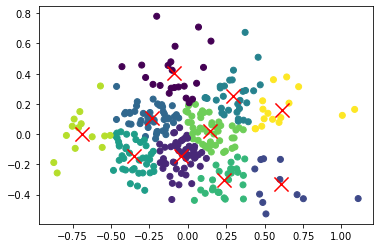

In [60]:
# Define the centroids and labels
centroidsPC = kMeansPC.cluster_centers_
labs = kMeansPC.labels_

# Plot
plt.scatter(redPitch[:,0], redPitch[:,1], c = labs)
plt.scatter(centroidsPC[:,0], centroidsPC[:,1], marker='x', c='r', s=200)
plt.show()

## PCA Clusters
Here we see the traditional output of a K - Means clustering plot, where our clusterss seem to be well refined. Generally the clusters are localized around their cluster, and this is good, because it implies 10 centroids is adequate enough for this cluster analysis. It would seem that at the clusters that lie on the edge of the the scatter plot tend to be more dispersed, which might encourage further increasing of K. (It should me mentioned that due to the black box nature of PCA, the x and y axes don't have any actual meaning. It somewhat be interpreted as a conglomeratation of the 12 dimensions of meaningful variables we had initially).

## Conclusion
All in all we've determined that we cannot detect players who are undervalued because of their underperformance in one year from this analysis. It might prove useful to increase the amount of centroids to get more defined cluster edges, then to rerun our analysis. 

Some improvements to this model scheme might be in the form of...
* Running a LASSSO/L1 regression (FIP ~ . ) because we can determine if all of our variables actually significant when it comes to predicting our desired metric, FIP. This would allow us to do an early dimension reduction.
* To use a Gaussian mixtures approach alongside the K - Means algorithm. This is because Gaussian mixtures an uncertainity measure along with assignment to a cluster, which could help is our selection of which players to analyze their WAR/IP.